In [20]:
import pandas as pd
import tensorflow as tf

from window import WindowGenerator
from utils import train_test_val_split

In [21]:
def train_case(case_df, model, in_width, out_steps, max_epochs):
    """ Train model for given case df. """
    
    outlets = [ col for col in case_df.columns.values if col.startswith('outlet') ]
    column_indices = { name: i for i, name in enumerate(case_df.columns) }

    train_df, test_df, val_df = train_test_val_split(case_df)
    # train_df, test_df, val_df = normalize_datasets(train_df, test_df, val_df)

    label_columns = outlets

    multi_window = WindowGenerator(
        train_df=train_df,
        val_df=val_df,
        test_df=test_df,
        input_width=in_width,
        label_width=out_steps,
        shift=out_steps,
        label_columns=label_columns
    )

    history = model.fit(
        multi_window.train,
        epochs=max_epochs,
        validation_data=multi_window.val,
        verbose=0
        # callbacks=[early_stopping]
    )

    return multi_window, history

In [22]:
def plot_losses(history):
    losses = pd.DataFrame(history.history)

    losses[['loss', 'val_loss']].plot(figsize=(10,8), xlabel="Epoch", ylabel="Loss", title="Model loss")
    losses[['root_mean_squared_error', 'val_root_mean_squared_error']].plot(figsize=(10,8), xlabel="Epoch", ylabel="RMSE", title="RMSE")

# Dataset

In [23]:
case_1 = pd.read_csv("../datasets/case_1.csv")
case_2 = pd.read_csv("../datasets/case_2.csv")
case_3 = pd.read_csv("../datasets/case_3.csv")
case_4 = pd.read_csv("../datasets/case_4.csv")
case_5 = pd.read_csv("../datasets/case_5.csv")

In [24]:
outlets = [ col for col in case_1.columns.values if col.startswith('outlet') ]
label_columns = outlets
num_features = case_1.shape[1]

In [25]:
column_indices = { name: i for i, name in enumerate(case_1.columns) }

# Model Creation

In [26]:
IN_WIDTH = 8
OUT_STEPS = 8
MAX_EPOCHS = 20
features_size = len(label_columns)

In [27]:
print(f"Using {IN_WIDTH*5}s of data to predict {OUT_STEPS*5}s.")
print(f"Using {IN_WIDTH*5/60}min of data to predict {OUT_STEPS*5/60}min.")

Using 40s of data to predict 40s.
Using 0.6666666666666666min of data to predict 0.6666666666666666min.


In [28]:
CONV_WIDTH = 3 # default 3
multi_conv_model = tf.keras.Sequential([
    # Shape [batch, time, features] => [batch, CONV_WIDTH, features]
    tf.keras.layers.Lambda(lambda x: x[:, -CONV_WIDTH:, :]),
    # Shape => [batch, 1, conv_units]
    tf.keras.layers.Conv1D(256, activation='relu', kernel_size=(CONV_WIDTH)),
    # Shape => [batch, 1,  out_steps*features]
    tf.keras.layers.Dense(OUT_STEPS*features_size,
                          kernel_initializer=tf.initializers.zeros()),
    # Shape => [batch, out_steps, features]
    tf.keras.layers.Reshape([OUT_STEPS, features_size])
])

multi_conv_model.compile(loss=tf.losses.MeanSquaredError(),
                         optimizer=tf.optimizers.Adam(),
                         metrics=[tf.metrics.RootMeanSquaredError()])

# history = compile_and_fit(multi_conv_model, multi_window)

# IPython.display.clear_output()

# multi_val_performance['Conv'] = multi_conv_model.evaluate(multi_window.val)
# multi_performance['Conv'] = multi_conv_model.evaluate(multi_window.test, verbose=0)
# multi_window.plot(multi_conv_model)

## Case 1

In [29]:
window, history = train_case(
    case_df=case_1,
    model=multi_conv_model,
    in_width=IN_WIDTH,
    out_steps=OUT_STEPS,
    max_epochs=MAX_EPOCHS
)

2022-08-29 18:32:36.623098: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-08-29 18:32:37.121152: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


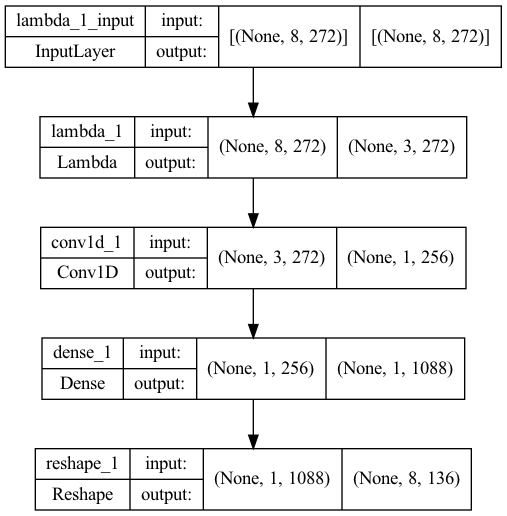

In [30]:
tf.keras.utils.plot_model(multi_conv_model, "../plots/models/multi_conv_model.png", show_shapes=True)

label_col_index 135
label_col_index 135
label_col_index 135


2022-08-29 18:32:45.749624: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


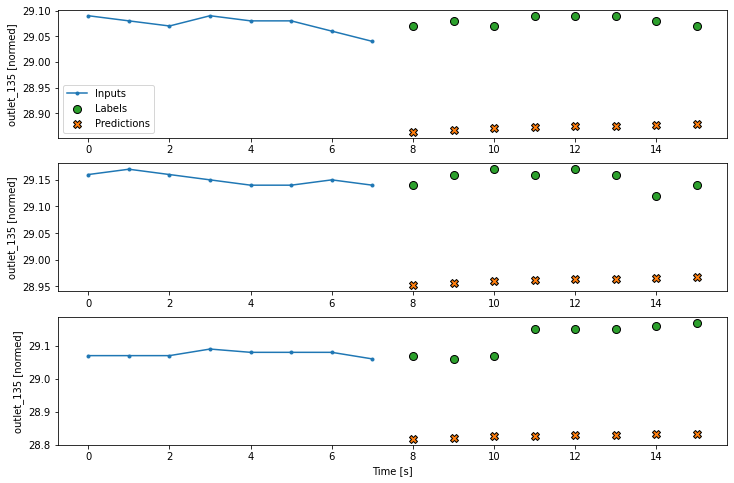

In [31]:
window.plot(multi_conv_model, plot_col="outlet_135")

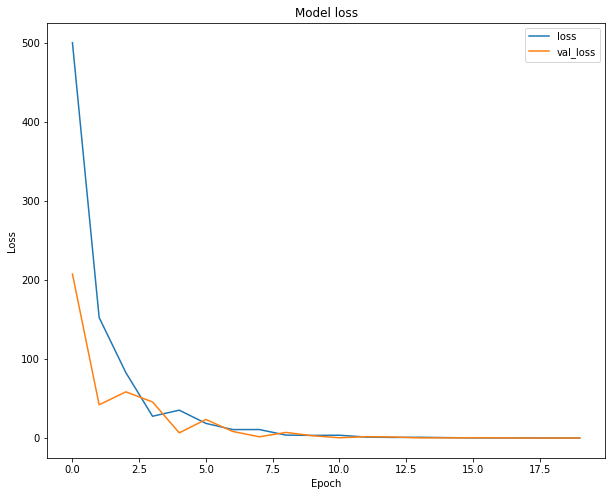

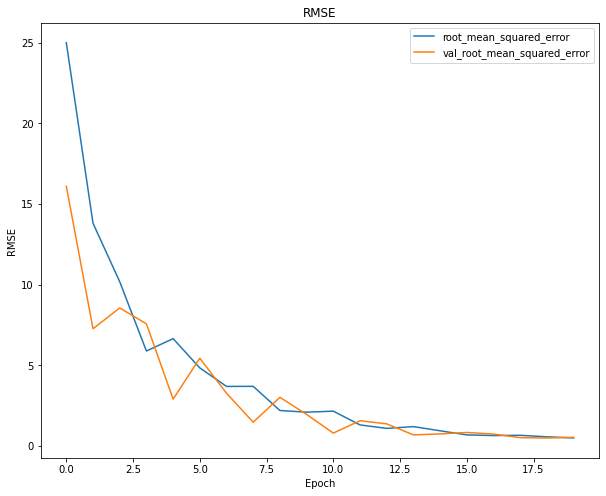

In [32]:
plot_losses(history=history)

In [33]:
multi_conv_model.evaluate(window.test)

1/1 [==============================] - 0s 323ms/step - loss: 0.1937 - root_mean_squared_error: 0.4946


[0.1936933696269989, 0.49456191062927246]

## Case 2

In [34]:
window, history = train_case(
    case_df=case_2,
    model=multi_conv_model,
    in_width=IN_WIDTH,
    out_steps=OUT_STEPS,
    max_epochs=MAX_EPOCHS
)

label_col_index 135
label_col_index 135
label_col_index 135


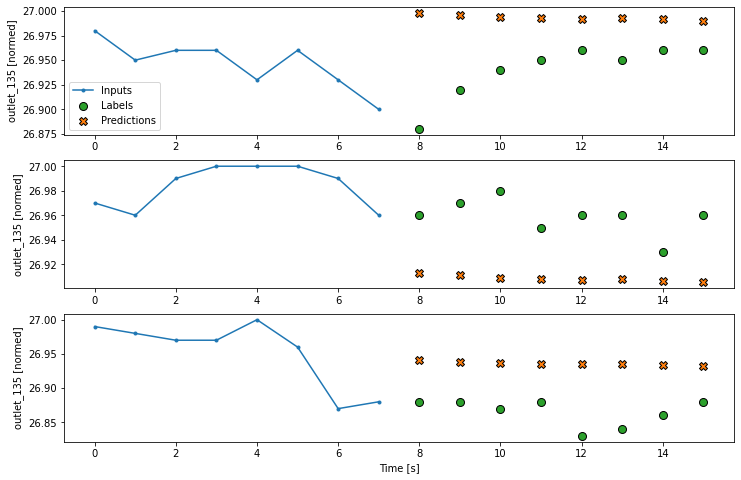

In [35]:
window.plot(multi_conv_model, plot_col="outlet_135")

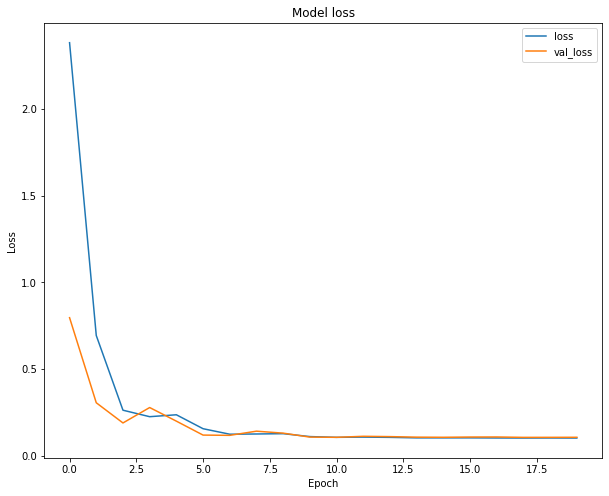

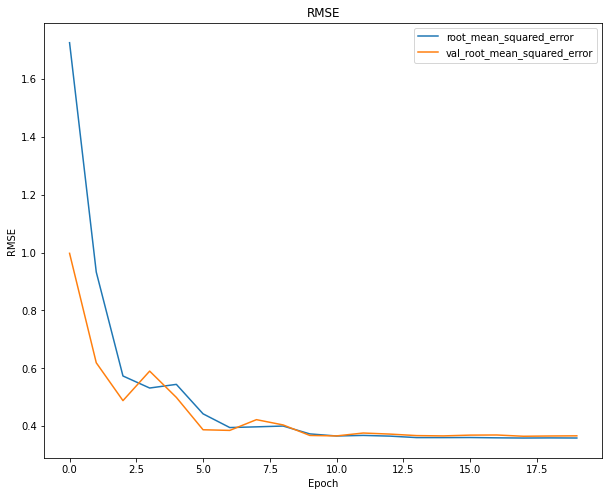

In [36]:
plot_losses(history=history)

In [37]:
multi_conv_model.evaluate(window.test)

1/1 [==============================] - 0s 252ms/step - loss: 0.1010 - root_mean_squared_error: 0.3498


[0.10101066529750824, 0.349839448928833]

## Case 3

In [38]:
window, history = train_case(
    case_df=case_3,
    model=multi_conv_model,
    in_width=IN_WIDTH,
    out_steps=OUT_STEPS,
    max_epochs=MAX_EPOCHS
)

label_col_index 135
label_col_index 135
label_col_index 135


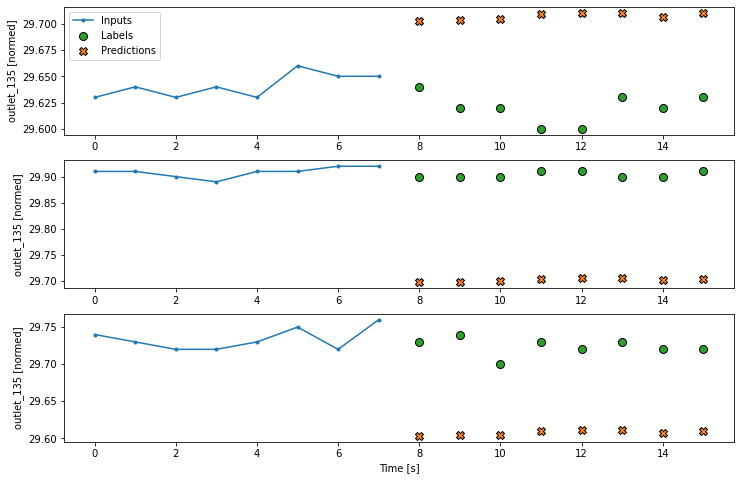

In [39]:
window.plot(multi_conv_model, plot_col="outlet_135")

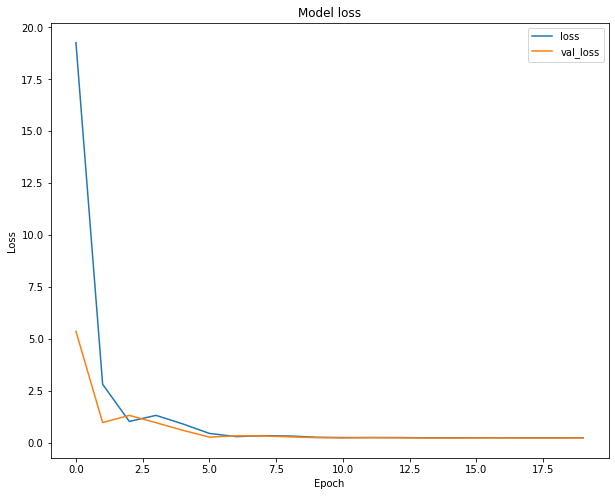

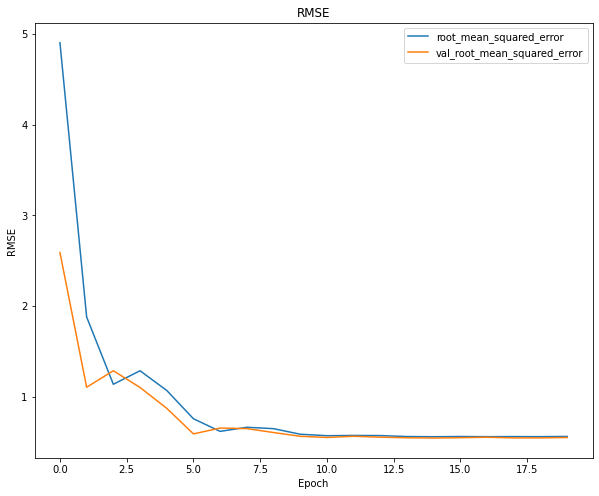

In [40]:
plot_losses(history=history)

In [41]:
multi_conv_model.evaluate(window.test)

1/1 [==============================] - 0s 340ms/step - loss: 0.2105 - root_mean_squared_error: 0.5181


[0.21051891148090363, 0.5180814862251282]

## Case 4

In [42]:
window, history = train_case(
    case_df=case_4,
    model=multi_conv_model,
    in_width=IN_WIDTH,
    out_steps=OUT_STEPS,
    max_epochs=MAX_EPOCHS
)

label_col_index 135
label_col_index 135
label_col_index 135


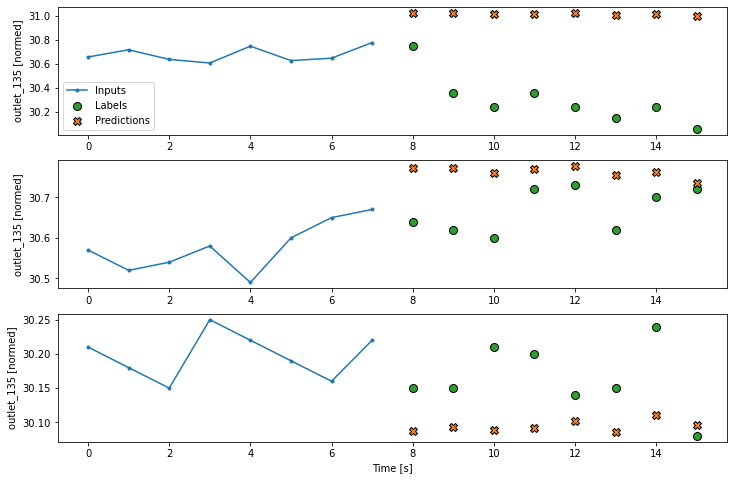

In [43]:
window.plot(multi_conv_model, plot_col="outlet_135")

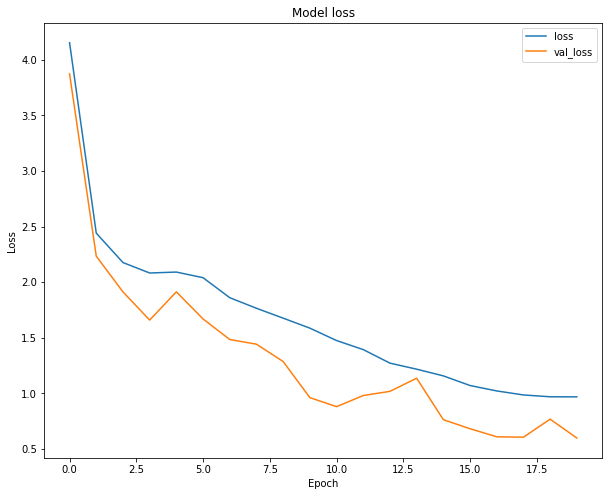

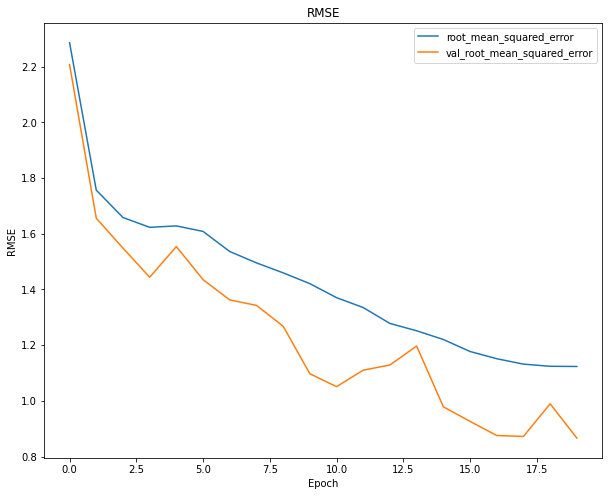

In [44]:
plot_losses(history=history)

In [45]:
multi_conv_model.evaluate(window.test)

1/1 [==============================] - 0s 261ms/step - loss: 0.6072 - root_mean_squared_error: 0.8712


[0.6072288155555725, 0.8712158799171448]

## Case 5

In [46]:
window, history = train_case(
    case_df=case_5,
    model=multi_conv_model,
    in_width=IN_WIDTH,
    out_steps=OUT_STEPS,
    max_epochs=MAX_EPOCHS
)

label_col_index 135
label_col_index 135
label_col_index 135


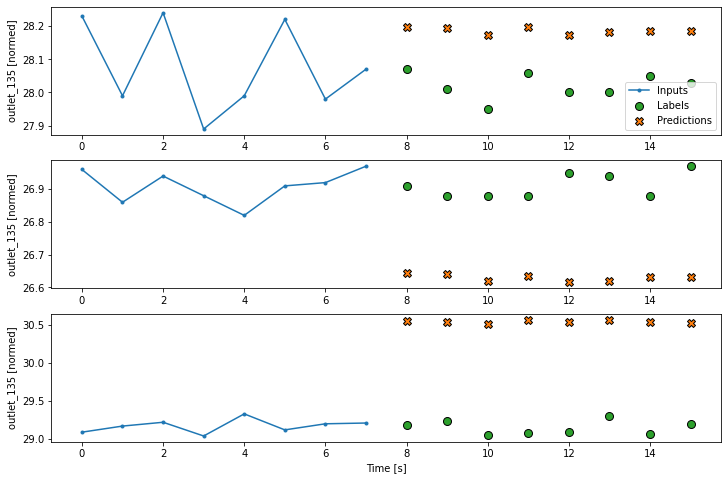

In [47]:
window.plot(multi_conv_model, plot_col="outlet_135")

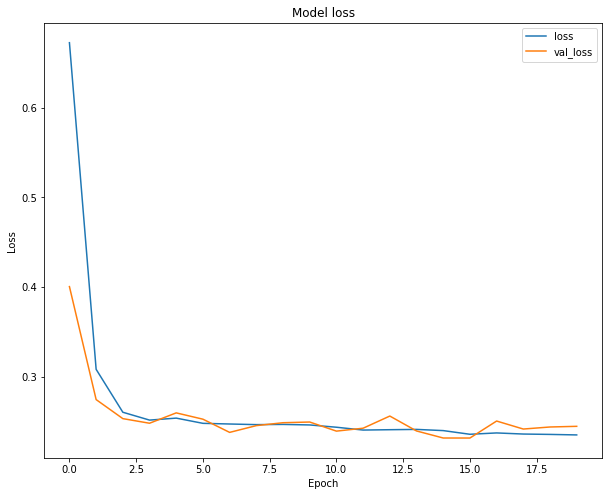

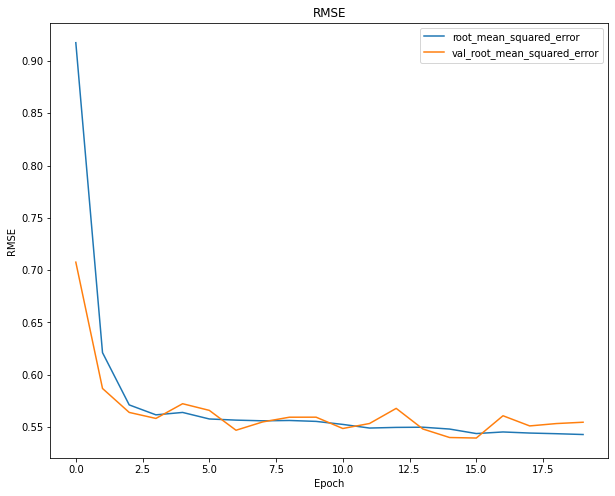

In [48]:
plot_losses(history=history)

In [49]:
result = multi_conv_model.evaluate(window.test)

2/2 [==============================] - 0s 6ms/step - loss: 0.3137 - root_mean_squared_error: 0.6284
